In [20]:
from graphviz import Digraph
from collections import deque

In [3]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

CURR: A
TODO: deque([B, E])
CURR: B
TODO: deque([E, C])
CURR: E
(A, E)


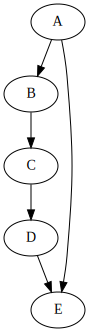

In [21]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}

        self.visited = set() # Node's we've been to

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search(self, source, destination):
        # 1. wipe out visited
        self.visited = set()

        # 2. start the recursive search
        node1 = self.nodes[source]
        node2 = self.nodes[destination]
        return node1.dfs_search(node2)
    
    # breadth first search (BFS)
    def bfs_search(self, source, destination):
        node1 = self.nodes[source]
        node2 = self.nodes[destination]
        return node1.bfs_search(node2)

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None
                
    def __repr__(self):
        return self.name
    
    def dfs_search(self, dst):
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)
        
        if self == dst:
            return (self,)
        for child in self.children:
            childpath = child.dfs_search(dst)
            if childpath != None:
                return (self,) + childpath
        return None

    # breadth first search will find the shortest path
    # (it's not recursive!)
    # v1: just return True/False (is there path)
    # v2: return the actual path as a tuple
    def bfs_search(self, dst):
        todo = deque([self]) # work to be done (visiting nodes) -- front of list (index 0) is done first
        # 1. what is more efficient?
        # 2. what if we want to explore nodes in a different order?
        added = {self}
        
        while len(todo) > 0:
            # 1. check the current node
            curr_node = todo.popleft()
            print("CURR:", curr_node)
            if curr_node == dst:
                return self.backtrace(dst)
            
            # 2. record any new work that we discover
            for child in curr_node.children:
                if not (child in added):
                    todo.append(child)
                    added.add(child)
                    child.finder = curr_node
            print("TODO:", todo)

        return None
    
    # give tuple path to dst (how did we get there)
    def backtrace(self, dst):
        # dst, dst.finder, dst.finder.finder, ...
        back_path = []
        
        # TODO: add some nodes
        curr = dst
        while curr != None:
            back_path.append(curr)
            curr = curr.finder

        return tuple(reversed(back_path))

g = example(2)
print(g.bfs_search("A", "E"))
g

In [10]:
# TODO: write a method to chain together node, node.finder, node.finder.finder, etc (to get a path)
g.nodes["D"].finder

C

In [11]:
g.nodes["D"].finder.finder

B

In [12]:
print(g.nodes["D"].finder.finder.finder)

None


In [15]:
# queue pattern (use Python's deque)
from collections import deque

d = deque([])
d.append(1)   # FAST -- O(1), like a list
d.append(2)
d.append(3)
d

deque([1, 2, 3])

In [16]:
x = d.popleft()   # FAST -- O(1), much better than a list (which would be O(N))
x

1

In [17]:
d

deque([2, 3])

In [18]:
print(d.popleft())
print(d.popleft())
d

2
3


deque([])

In [23]:
# heapq is a bunch a functions that efficiently manage lists
# (heapq is not its own type)
import heapq

In [27]:
data = [] # regular list

for x in [5,3,1,4,2]:
    # 1. adds a value to the list
    # 2. shuffles around the values so that the smallest value is in front
    # 3. does so in O(log N) time
    heapq.heappush(data, x)

data

[1, 2, 3, 5, 4]

In [28]:
while len(data) > 0:
    # 1. removes the smallest value from the list
    # 2. reshuffles around the values so that the smallest value is in front
    # 3. does so in O(log N) time
    x = heapq.heappop(data)
    print("VALUE:", x)
    print("DATA:", data)

VALUE: 1
DATA: [2, 4, 3, 5]
VALUE: 2
DATA: [3, 4, 5]
VALUE: 3
DATA: [4, 5]
VALUE: 4
DATA: [5]
VALUE: 5
DATA: []


In [34]:
[1,2]*10

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

,stack,queue,prio queue
1000,0.162125,0.343561,5.839348
2000,0.167370,0.532866,10.301590
5000,0.146389,1.862049,24.374008
10000,0.151157,3.120422,47.554970


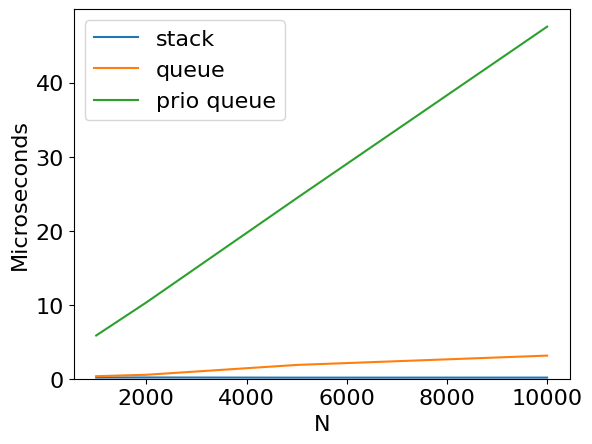

In [36]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt

iters = 1000

def benchmark_microsec(data, pattern):
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            data.append(i % 10)
            _ = data.pop(0)
        elif pattern == "prio queue":
            data.append(i % 10)
            data.sort()
            _ = data.pop(0)

        # TODO: priority queue
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec([1]*N, "queue")
    df.loc[N,"prio queue"] = benchmark_microsec([1]*N, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

,stack,queue,prio queue
1000,0.155736,0.172911,0.557254
2000,0.150902,0.169857,0.601967
5000,0.152616,0.172061,0.672294
10000,0.150717,0.167897,0.699556


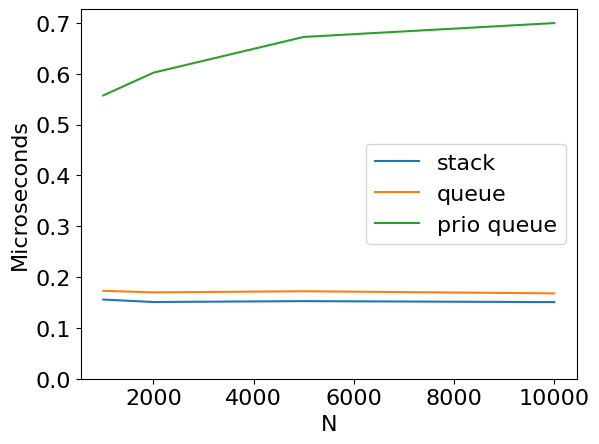

In [38]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt

iters = 1000000

def benchmark_microsec(data, pattern):
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            # still use a list
            data.append(i % 10)
            _ = data.pop(-1)
            
        elif pattern == "queue":
            # want to use a deque instead of a list
            data.append(i % 10)
            _ = data.popleft()

        elif pattern == "prio queue":
            # want to use heapq instead of a simple list
            heapq.heappush(data, i % 10)
            _ = heapq.heappop(data)

        # TODO: priority queue
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")
    df.loc[N,"queue"] = benchmark_microsec(deque([1]*N), "queue")
    data = [1]*N
    heapq.heapify(data) # shuffle around so that other heapq functions work
    df.loc[N,"prio queue"] = benchmark_microsec(data, "prio queue")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df